<a href="https://colab.research.google.com/github/Sophie-GJ/project-4-healthcare/blob/main/pima_women_diabetes_project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
df = pd.read_csv("pima_women_diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# Define features set
X = df.copy()
X.drop("Outcome", axis=1, inplace=True)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [6]:
# Define target vector
y = df["Outcome"].ravel()
y[:5]

array([1, 0, 1, 0, 1])

In [7]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [8]:
# Create a StandardScaler instances
scaler = StandardScaler()

In [9]:
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

In [10]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
# Create a random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [13]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [14]:
# Making predictions section
predictions = rf_model.predict(X_test_scaled)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [17]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,111,18
Actual 1,24,39


Accuracy Score : 0.78125
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       129
           1       0.68      0.62      0.65        63

    accuracy                           0.78       192
   macro avg       0.75      0.74      0.75       192
weighted avg       0.78      0.78      0.78       192



In [18]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.26213586133348277, 'Glucose'),
 (0.1628176191440802, 'BMI'),
 (0.13887538064327085, 'Age'),
 (0.12265228529597814, 'DiabetesPedigreeFunction'),
 (0.08772476513388347, 'BloodPressure'),
 (0.07792806235327324, 'Pregnancies'),
 (0.07620619644216055, 'Insulin'),
 (0.07165982965387079, 'SkinThickness')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

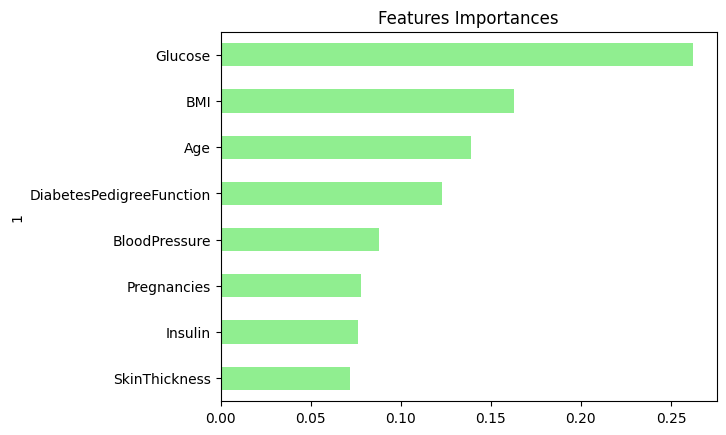

In [19]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)